In [1]:
import pandas as pd

# Load dataset
roc_data_df = pd.read_csv(r"C:\Users\shara\OneDrive\Desktop\Spring 2025\IS 733\roc_data.csv")

# Display basic info
print(roc_data_df.info())

# Show first few rows
print(roc_data_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Prediction        150 non-null    float64
 2   True_Label        150 non-null    int64  
 3   prediction_label  150 non-null    int64  
 4   TP                150 non-null    int64  
 5   FP                150 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 7.2 KB
None
   ID  Prediction  True_Label  prediction_label  TP  FP
0   1       0.998           1                 1   1   0
1   2       0.998           1                 1   1   0
2   3       0.998           1                 1   1   0
3   4       0.997           1                 1   1   0
4   5       0.997           1                 1   1   0


In [3]:
# Define threshold values
thresholds = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]

# Initialize lists to store TPR and FPR values
tpr_values = []
fpr_values = []

# Compute TPR and FPR for each threshold
for threshold in thresholds:
    # Convert probabilities to predicted labels
    roc_data_df["predicted"] = (roc_data_df["Prediction"] >= threshold).astype(int)

    # Compute TP, FP, FN, TN
    TP = ((roc_data_df["predicted"] == 1) & (roc_data_df["True_Label"] == 1)).sum()
    FP = ((roc_data_df["predicted"] == 1) & (roc_data_df["True_Label"] == 0)).sum()
    FN = ((roc_data_df["predicted"] == 0) & (roc_data_df["True_Label"] == 1)).sum()
    TN = ((roc_data_df["predicted"] == 0) & (roc_data_df["True_Label"] == 0)).sum()

    # Calculate TPR and FPR
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0

    # Store values
    tpr_values.append(TPR)
    fpr_values.append(FPR)

# Print computed values
print("Thresholds:", thresholds)
print("TPR Values:", tpr_values)
print("FPR Values:", fpr_values)


Thresholds: [0.95, 0.9, 0.85, 0.8, 0.75, 0.7]
TPR Values: [0.5416666666666666, 0.6388888888888888, 0.7083333333333334, 0.75, 0.7638888888888888, 0.8055555555555556]
FPR Values: [0.05128205128205128, 0.0641025641025641, 0.0641025641025641, 0.0641025641025641, 0.07692307692307693, 0.07692307692307693]


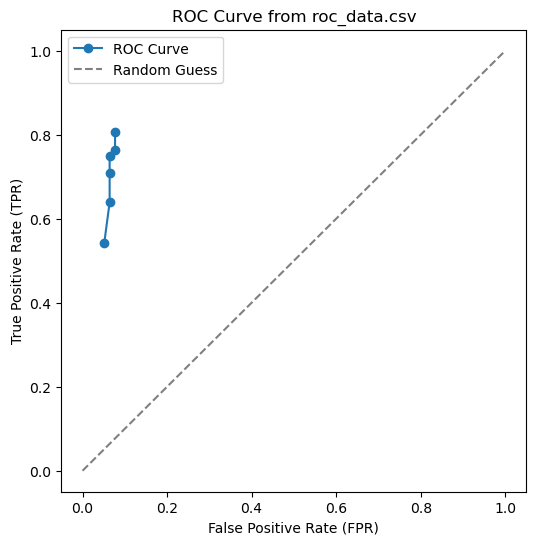

In [5]:
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='-', label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve from roc_data.csv")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import auc

# Compute AUC score
roc_auc = auc(fpr_values, tpr_values)

# Print AUC score
print(f"AUC Score: {roc_auc:.4f}")


AUC Score: 0.0173
